In [3]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [4]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

# 第20章 投資組合理論及其應用

400 多年前，西班牙文學大師塞萬提斯在其巨作《唐吉軻德》中提出了一個現在被投資界奉為經典的思想：「智者不會把所有的雞蛋放在同一個籃子裡。」早在《戰國策·齊策四》的名篇《馮諼客孟嘗君》裡，馮諼也提出類似的概念：「狡免三窟，僅得免其死耳。今有一窟，未得高枕而臥也。」這兩句廣為流傳的話都在強調不要把所有的家當放在同一處，要分佈風險。用在投資上，就意味著要把財富配置到不同的資產上，即理財時要進行分散投資。當前投資領域中，可供投資的金融工具十分豐富，常見的包括銀行存款、基金、債券、股票，還有期貨期權等衍生品。多數人不知不覺中就進行了分散投資的行為，比如現在很多人會把原本放在銀行的存款轉出一部分買銀行的理財產品（不同的理財產品投資標的物不同，通常標的物包括信託、債券、基金、股票等，投資人購買理財產品就間接地將財富分佈到不同金融工具），有些人直接購買債券、基金、股票等風險稍高的金融資產，還有些投資人在外匯、商品、期貨、期權等市場進行交易。除了金融資產外，有些人會在實物資產市場中進行投資，比如房地產市場、古董市場等。

那如何分散投資能實現最大程度地獲取收益，而最小程度地承擔風險呢？資產配置（Asset Allocation）主要就是解決這個問題。資產配置是將財富分佈到各種不同的資產之中，目的是為了在未來某個時點達成某個收益目標，透過合理的配置，能夠在達成收益目標的過程中，將財富的波動程度控制在個人可以接受的範圍內，並有很大的機率能夠達成目標。顯然，在資產未來的價格充滿不確定的前提下，資產配置有其必要性。

本章先以兩種風險資產為例，來說明分散投資的優點；然後將其擴展至多種資產的情境，來說明為什麼分散投資能夠降低風險。之後將為讀者介紹經典的 Markowitz 均值－變異數投資組合模型，該模型能夠提供最優資產配置比例，使得預期的收益水平下達到風險最小。最後將介紹更加符合現實的延伸模型：Black-Litterman 模型。

## 20.1 投資組合的收益率與風險

在擴展到 $N$ 種風險資產之前，我們現在先來看只有兩種風險資產的情形。假設現在市場有資產 $A$ 和 $B$，其隨機收益率分別為 $R_A$ 和$R_B$，若投資人將其財富的一部分投入到資產 $A$，剩餘的投入到資產 $B$，投資比例分別為 $\omega_A$ 和 $\omega_B$，且 $\omega_A+\omega_B=1$。如果投資人初期資本為 $W_0$，則在資產 $A$ 上的收益為 $W_0\omega_AR_A$，在資產 $B$ 上的收益為 $W_0\omega_BR_B$，整體收益為 $W_0\omega_AR_A+W_0\omega_BR_B$，知道初始資本、收益及可求得投資組合的收益率 $R_p$：

$$
\begin{split}
R_p&=\frac{\mbox{總收益}}{\mbox{初始投入資本}}=\frac{W_0\omega_AR_A+W_0\omega_BR_B}{W_0} \\
&=\omega_AR_A+\omega_BR_B
\end{split}
$$

回顧前一章，特定資產的風險可以用很多種方式來衡量，不過考慮到方便性和易解性，本章延續用收益率的變異數（標準差）來指代風險。單個資產收益率的變異數為：

$$\sigma^2(R_i)=\mathrm{E}\Big\{\big[R_i-\mathrm{E}(R_i)\big]^2\Big\}$$

兩個資產組成的投資組合的變異數為：

$$
\begin{split}
\sigma^2(R_p)&=\mathrm{E}\Big\{\big[R_p-\mathrm{E}(R_p)\big]^2\Big\} \\
&=\mathrm{E}\Big\{\big[\omega_AR_A+\omega_BR_B-\mathrm{E}(\omega_AR_A+\omega_BR_B)\big]^2\Big\} \\
&=\mathrm{E}\Big\{\big\{\omega_A\big[R_A-\mathrm{E}(R_A)\big]+\omega_B\big[R_B-\mathrm{E}(R_B)\big]\big\}^2\Big\} \\
&=\mathrm{E}\Big\{\omega_A^2\big[R_A-\mathrm{E}(R_A)\big]^2+\omega_B^2\big[R_B-\mathrm{E}(R_B)\big]^2+ \\
&\ \quad2\omega_A\omega_B\big[R_A-\mathrm{E}(R_A)\big]\big[R_B-\mathrm{E}(R_B)\big]\Big\} \\
&= \omega_A^2\sigma^2(R_A)+\omega_B^2\sigma^2(R_B)+2\omega_A\omega_B\sigma(R_A,R_B)
\end{split}
$$

標準差為：

$$\sigma(R_p)=\sqrt{\omega_A^2\sigma^2(R_A)+\omega_B^2\sigma^2(R_B)+2\omega_A\omega_B\sigma(R_A,R_B)}$$

其 $\sigma(R_A,R_B)$ 為資產 $A$ 與資產 $B$ 的共變異數，

\begin{equation}
\sigma(R_A,R_B)=\mathrm{E}\big\{\big[R_A-\mathrm{E}(R_A)\big]\big[R_B-\mathrm{E}(R_B)\big]\big\}\label{eq:20.1}
\end{equation}

從公式 (\ref{eq:20.1}) 可以看出，如果資產 $A$ 與資產 $B$ 收益率變化趨勢是一致的（比如資產 $A$ 的收益率高於期望值時資產 $B$ 的收益率也高於期望值），則其共變異數正；反之，若變化趨勢相反，則共變異數為負。共變異數常常用來判斷兩個變數之間的相關性，不過由於共變異數會受比例影響（比如把 $R_A$ 和 $R_B$ 同時擴大 10 倍，共變異數會放大 100 倍），因此統計學家引入相關係數來刻畫兩變數之間的相關性。資產 $A$ 和 $B$ 收益率之間的相關係數為：

$$\rho_{A,B}=\frac{\sigma(R_A,R_B)}{\sigma(R_A)\sigma(R_B)}$$

該值處在 $[-1,+1]$ 區間內，若取 $[-1,0)$，則說明兩資產收益率變化趨勢相反；若取 $(0,1]$，則說明兩資產收益率同向變化；若取 0，則說明兩資產收益率在線性關係上不相關。接下來，我們舉個例子來看不同比例投資比例、不同相關係數對投資組合收益率的標準差的影響。

**Example.**
市場有資產 $A$ 和 $B$，收益率分別為 $R_A$ 和 $R_B$，收益率的期望值 $\mathrm{E}(R_A)$、$\mathrm{E}(R_B)$ 分別為 8% 和 15%，標準差 $\sigma(R_A)$、$\sigma(R_B)$ 分別 12% 和 25%。當兩資產的相關係數分別為 -1,-0.5,0,+0.5,+1 時，不同的投資比例下投資組合的期望收益率及風險分別是如何變化的？根據公式，資產組合的期望收益率為：

$$
\begin{split}
\mathrm{E}(R_p)&=\omega_A\mathrm{E}(R_A)+\omega_B\mathrm{E}(R_B) \\
&=0.08\omega_A+0.15(1-\omega_A) \\
&=0.15-0.07\omega_A
\end{split}
$$

風險（收益率的標準差）為：

$$
\begin{split}
\sigma(R_p)&=\sqrt{\omega_A^2\sigma^2(R_A)+\omega_B^2\sigma^2(R_B)+2\omega_A\omega_B\sigma(R_A,R_B)} \\
&=\sqrt{0.0144\omega_A^2+0.0625(1-\omega_A)^2+2\omega_A(1-\omega_A)\rho_{A,B}\times 0.03}
\end{split}
$$

當變動 $\omega_A$ 的值時，可以得到表 20.1：

>表20.1：不同相關係數對投資組合風險的影響

A資產投資比|B資產投資比|$R_p$之期望值|(兩　種|資　產|之　相|關　係|數　$\rho_{A,B}$)
:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:
| | |-1|-0.5|0|+0.5|+1
0%|100%|15.0%|25.00%|25.00%|25.00%|25.00%|25.00%
10%|90%|14.3%|21.30%|21.92%|22.53%|23.12%|23.70%
20%|80%|13.6%|17.60%|18.91%|20.14%|21.30%|22.40%
30%|70%|12.9%|13.90%|16.01%|17.87%|19.55%|21.10%
40%|60%|12.2%|10.20%|13.27%|15.75%|17.89%|19.80%
50%|50%|11.5%|6.50%|10.83%|13.87%|16.35%|18.50%
60%|40%|10.8%|2.80%|8.94%|12.32%|14.96%|17.20%
70%|30%|10.1%|0.90%|7.99%|11.26%|13.78%|15.90%
80%|20%|9.4%|4.60%|8.32%|10.82%|12.85%|14.60%
90%|10%|8.7%|8.30%|9.79%|11.09%|12.24%|13.30%
100%|0%|8.0%|12.00%|12.00%|12.00%|12.00%|12.00%

從表20.1的橫向看，當投資比例維持不變時，兩資產的相關係數愈高，風險愈大。若兩資產收益率同向變動，當收益大於其期望值的情境發生時，兩資產的收益均大於各自的期望值，反之均小於各自的期望值，整體收益變動比較劇烈；若兩資產收益率反向變動，兩資產的收益一個會高於期望值，一個會低於期望值，一高一低會使整體收益變動幅度減小，達到降低風險的作用。

從這個例子我們可以推斷出這樣一個結論：分散投資（Diversification）可以降低風險。通常，我們認為證券投資的風險由兩部分組成：系統性風險（Systematic Risk）和非系統風險（Idiosyncratic Risk / Nonsystematic Risk）。非系統風險又稱可分佈風險，是指只對特定工業或特定企業的證券產生影響的風險、比如油價旳調整會影響到石油工業的企業，也會影響到運輸工業的個股股價，但是市場中不少股票可能不受影響。不同的企業在同一段時間內所遭受的非系統風險可能不同，比如 $A$ 企業可能由於研發現行成功而股價大増，$B$ 企業可能由於丟失訂單而股價大減，若共同持有兩支股票，損益會相互抵消，從而降低收益率的波動，減小風險，因此非系統性風險是可以透過分散投資消除的。系統性風險是對整個股票巿場普遍產生不利影響的風險，該類風險的來源多是政治環境、整體經濟等關係全域的因素。系統性風險是無法透過分散投資降低的，比如 2008 年金融海嘯發生時，所有的股票價格都下跌，投資人無法透過分散投資來獲得穩定的收益。

分析表 20.1 的數據可以看出，不同的相關係數，風險的變動情況是不同的。我們可以用 Python 將不同相關係數下，投資組合標準差隨投資比例變動的情況畫出。結果在下圖呈現：

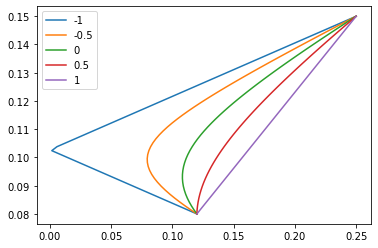

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
def cal_mean(frac):
    return(0.08*frac+0.15*(1-frac))

mean=list(map(cal_mean,[x/50 for x in range(51)]))
sd_mat=np.array([list(map(lambda x: math.sqrt((x**2)*0.12**2+
        ((1-x)**2)*0.25**2+2*x*(1-x)*(-1.5+i*0.5)*0.12*0.25),[x/50 for x in range(51)])
        ) for i in range(1,6)])
plt.plot(sd_mat[0,:],mean,label='-1')
plt.plot(sd_mat[1,:],mean,label='-0.5')
plt.plot(sd_mat[2,:],mean,label='0')
plt.plot(sd_mat[3,:],mean,label='0.5')
plt.plot(sd_mat[4,:],mean,label='1')
plt.legend(loc='upper left')

前文中我們已經瞭解到兩種風險資產構成的投資組合之收益率與風險如何度量，接下來我們將投資情境一般化。假設市場上有 $N$ 種風險資產，資產的收益率分別為 $R_1,R_2,...,R_N$，投資人在各個資產上的投資比重分別 $\omega_1,\omega_2,...\omega_N$，則投資組合的收益率 $R_p$ 為：

\begin{align}
R_p&=\omega_1R_1+\omega_2R_2+...+\omega_NR_N\nonumber\\
&= \sum_{i=1}^{N}\omega_iR_i\label{eq:20.2}\\
\end{align}

公式 (\ref{eq:20.2}) 中資產 $i$ 的投資比重 $\omega_i$ 是投資人在資產 $i$ 中的投資金額與總投資金額之比，各資產的投資比重之和為應為 1，即 $\sum_{i=1}^{N}\omega_i=1$，若 $N$ 種資產期望收益率分別是 $\mathrm{E}(R_1),\mathrm{E}(R_2),...,\mathrm{E}(R_N)$，則投資組合的期望收益率為：

$$
\begin{split}
\mathrm{E}(R_p)&=\omega_1\mathrm{E}(R_1)+\omega_2\mathrm{E}(R_2)+...+\omega_N\mathrm{E}(R_N) \\
&=\sum_{i=1}^{N}\omega_i\mathrm{E}(R_i)
\end{split}
$$

該投資組合收益率 $R_p=\sum_{i=1}^{N}\omega_iR_i$ 的變異數為：

$$
\begin{split}
\sigma^2(R_p)&=\sigma^2\left(\sum_{i=1}^{N}\omega_iR_i\right) \\
&=\sum_{i=1}^{N}\omega_i^2\sigma^2(R_i)+\sum_{i\ne j}\omega_i\omega_j\sigma(R_i,R_j)
\end{split}
$$

投資人規劃資產配置的前提是對未來形成預期（也就是已知末來各資產 $R_1,R_2,...,R_N$的概率分佈），也知曉自己的投資目標，然後在自己財務狀況允許的基礎上決定各資產的投資比重 $\omega_1,\omega_2,...\omega_N$，盡可能達成投資目標。

## 20.2 Markowitz 均值－變異數模型

經濟金融領域分析個人行為時往往會談到效用（Utility），在研究投資人資產配置行為時也不例外。延續上一節的市場狀況，假定現在投資人初始的財富為 $W_0$，在 $N$ 種資產上的投資比重分別為 $\omega_1,\omega_2,...\omega_N$，未來收益為 $R_p$，則投資人的未來財富水平 $W=W_0(1+R_p)$，由於 $R_p$ 是隨機變數，未來財富水平 $W$ 也是一個隨機變數。如果投資人的效用水平僅與財富狀況相關，則效用水平 $U(R_p)$ 也是隨機變數，其期望值為 $\mathrm{E}\big[U(R_p)\big]$。在經濟金融領域，通常我們都認為個人決策的出發點是為了最大化效用（或期望效用）;倘若如此，投資決策過程就可以精簡成以下數學問題：

\begin{align}
&\max_{\omega_i}\mathrm{E}[U(W_0R_p)]=\mathrm{E}\left[U\left(\sum_{i=1}^{N}\omega_iR_iW_0\right)\right]\nonumber\\
&\mathit{s.\!t.}\quad\sum_{i=1}^{N}\omega_i=1\label{eq:20.3}\\
\end{align}

也就是說投資人投資初期要決定各個資產的投資比重，期待該行為能夠最大化投資結束時效用的期望值。由於公式 (\ref{eq:20.3})中 $W_0$ 是確定值，不會影響到決策變數，因此以上問題可以簡化成：

\begin{align}
&\max_{\omega_i}\mathrm{E}[U(R_p)]=\mathrm{E}\left[U\left(\sum_{i=1}^{N}\omega_iR_i\right)\right]\nonumber\\
&\mathit{s.\!t.}\quad\sum_{i=1}^{N}\omega_i=1\label{eq:20.4}\\
\end{align}

其中 $\mathrm{E}[U(R_p)]$ 可以用泰勒展開式（Taylor expansion）表達為：

$$
\begin{split}
\mathrm{E}\big[U\big(R_p\big)\big]&=U\big(\mathrm{E}\big(R_p\big)\big)+\mathrm{E}\big[R_p-E\big(R_p\big)\big]U'\big(\mathrm{E}\big(R_p\big)\big) \\
&+\frac{1}{2}\mathrm{E}\Big\{\big[R_p-\mathrm{E}\big(R_p\big)\big]^2\Big\}U''\big(\mathrm{E}\big(R_p\big)\big)+\cdots \\
&+\frac{1}{n!}\mathrm{E}\Big\{\big[R_p-\mathrm{E}\big(R_p\big)\big]^n\Big\}U^{(n)}\big(\mathrm{E}\big(R_p\big)\big)+\cdots
\end{split}
$$

若 $R_1,R_2,...R_p$ 均服從常態分佈，則 (20.5) 僅依賴於投資組合收益率 $R_p$ 的期望值與變異數 [<sup>6</sup>](#fn6)。我們進一步假定，投資人的效用函數 $U()$ 是常見的凹函數（Concave Function），則投資人的決策問題可以簡化為：

\begin{align}
&\min_{\omega_i}\sigma^2(R_p)=\sum_{i=1}^{N}\omega_i^2\sigma^2(R_i)+\sum_{i\ne j}\omega_i\omega_j\sigma(R_i,R_j)\nonumber\\
&\mathit{s.\!t.}\quad\overline{R}_p=\sum_{i=1}^{N}\omega_i\mathrm{E}(R_i)\nonumber\\
&\quad\quad\sum_{i=1}^{N}\omega_i=1\label{eq:20.6}\\
\end{align}

其中 $\overline{R}_p$ 為投資人的投資目標，即投資人期待投資組合的期單值達到 $\overline{R}_p$，模型 (\ref{eq:20.6}) 說明投資人資產配置的原則是在達成投資目標 $\overline{R}_p$ 的前提下，要最小化資產組合的風險，這個模型就是 Markowitz 在 1952 年發表的「Portfolio Selection」一文的精隨，該文奠定了現代投資組合理論的基礎，也為 Markowitz 贏得了 1990 年的諾貝爾經濟學獎，式子 (\ref{eq:20.6}) 的決策變數為 $\omega_i,i=1,...,N$，整個數學形式是

><span id="fn6"> <sup>6</sup> 當效用函數為二次形式（Quadratic）時，期望效用也僅依賴 $R_1,R_2,...,R_N$ 的期望值及變異數，不過二次形式的效用函數太過於特殊，且不大符合現實，故在此不做詳述。</span>

二次規劃（Quadratic Programming）問題，可以用拉格朗日（Lagrange）方法求解。由於求解過程比較冗長，我們只給出一階條件：

$$
\begin{bmatrix}
\Sigma        & e & \overline{R} \\
e'            & 0 & 0            \\
\overline{R}' & 0 & 0
\end{bmatrix}
\begin{bmatrix}
\omega^\ast \\
\lambda_1   \\
\lambda_2
\end{bmatrix}
=
\begin{bmatrix}
0              \\
1              \\
\overline{R}_p
\end{bmatrix}
$$

其中 $\overline{R}$ 為 $N$ 種資產收益率期望值構成的列向量，$\Sigma$ 為 $N\times N$ 維收益率的共變異數矩陣（Covariance Matrix），$e$ 為 $N\times 1$ 的單位列向量。最終投資比重最優解形式滿足：

$$\omega^\ast=a+b\overline{R}_p$$

其中 $a$ 和 $b$ 與 $N$ 種資產收益率的期望值、變異數、共變異數有關，具體形式也較為複雜 [<sup>7</sup>](#fn7)。從式 (\ref{eq:20.8}) 可以看出，決策量的最優解 $\omega^\ast$ 與投資目標 $\overline{R}_p$ 呈線性關係，而風險 $\sigma^2(R_p)$ 是 $\omega$ 的二次函數形式，因此，當達到最優解時，風險水平 $\sigma^2(R_p)$ 是投資目標 $\overline{R}_p$ 的二次函數形式。如果用圖形表示投資目標 $\overline{R}_p$ 與最優解下標準差的關係，即得圖 20.2：

$$\mbox{沒有圖}$$

圖20.2：只考慮風險資產的效率前緣

><span id=fn7><sup>7</sup> $a\equiv\dfrac{\varsigma\Sigma^{-1}e-\alpha\Sigma^{-1}\overline{R}}{\varsigma\delta-\alpha^2}$，$b\equiv\dfrac{\delta\Sigma^{-1}\overline{R}-\alpha\Sigma^{-1}e}{\varsigma\delta-\alpha^2}$ 其中 $\alpha\equiv\overline{R}'\Sigma^{-1}e$，$\varsigma\equiv\overline{R}'\Sigma^{-1}\overline{R}$，$\delta\equiv e'\Sigma^{-1}e$</span>

圖中的曲線為最小變異前緣（Minimum-Variance Frontier），即在特定的投資目標 $\overline{R}_p$ 下能夠令投資組合收益率變異數（標準差）最小的資產配置比例。該線的上半段曲線被稱為效率前緣（Efficient Frontier），效率前緣上的資產配比既可以在特定的投資目標 $\overline{R}_p$ 下達到風險最小，又可以在特定的風險水平下達到期望收益率最大。整個資產配置流程的計算量不小，不過藉助 Python，我們能夠方便快捷地求得想要的結果，在下一節我們將用 Python 來實作 Markowitz 模型之資產配比過程。

本章行文至此，我們已經瞭解 $N$ 種風險資產下的資產配置過程。不過實務上，還有一個非常重要的、每個人投資人都接觸過的資產－－無風險資產，無風險資產是指無違約風險、收益率確定的資產，比較常見的如銀行存款、政府債券等。如果將無風險資產考慮進投資組合，則投資人面對的決策問題可以表達為：

\begin{align}
&\min_{\omega_i}\sigma^2(R_p)=\sum_{i=1}^{N}\omega_i^2\sigma^2(R_i)+\sum_{i\ne j}\omega_i\omega_j\sigma(R_i,R_j)\nonumber\\
&\mathit{s.\!t.}\quad\overline{R}_p=R_f+\sum_{i=1}^{N}\omega_i\big[\mathrm{E}(R_i)-R_f\big]\label{eq:20.9}\\
\end{align}

此時，投資人在風險資產上的投資比例依舊是 $\omega_1,\omega_2,...,\omega_N$，不過 $\sum_{i=1}^N\omega_i$ 不一定為 1 ，投資人會將 $1-\sum_{i=1}^{N}\omega_i$ 部分的資本投資在無風險資產。模型 (\ref{eq:20.9}) 的求解過程與只有風險資產的情況類似，也是用拉格朗日解法，其最優解依舊是投資目標 $\overline{R}_p$ 的線性函數形式：

$$\omega^\ast=\frac{\overline{R}_p-R_f}{\varsigma-2\alpha R_f+\delta R_f^2}\Sigma^{-1}\big(\overline{R}-R_fe\big)$$

各參數在前文中有提及，這裡不再重述。將 $\omega^\ast$ 代入最優投資組合的風險表示式 $\sigma_p^2={\omega^\ast}' V\omega^\ast$ 中，經過化簡可以發現，最優投資組合的標準差 $\sigma_p$ 與投資目標 $\overline{R}_p$ 呈線性關係。若用圖形畫出（縱軸為 $\overline{R}_p$，橫軸為 $\sigma_p$），我們可以得到一條線性的效率前緣；而且經過嚴格推導可以發現，考慮無風險資產的效率前緣恰好與捨棄無風險資產的效率前緣相切，如下圖所示。

$$\mbox{沒有圖}$$

圖20.3：考慮無風險資產時的效率前緣
如果所有的投資人對各資產未來收益率的估計是一致的，那麼理性投資人持有風險資產的相對比例應該是一樣的，風險偏好水平不同只會影響到持有無風險資產的比例。每個投資人持有的相同相對投資比例的風險資產組合即為市場投資組合（Market Portfolio），即圖 20.3 中切點的位置對應的投資組合，該投資組合中各資產的投資比例為 $\omega_m$，收益率為 $R_m$，收益率的期望值和變異數分別為 $\mathrm{E}(R_m)$ 和 $\sigma_m^2$。當然，現實中每個投資人對未來收益率的估計不同，自然每個人持有的風險資產組合的投資比例也不盡相同。圖中的切線，也就是市場投資組合與無風險資產之間的連線，被稱為資本市場線（Capital Market Line），可以表達為：

\begin{equation}
\mathrm{E}(R_p)=R_f+\frac{\mathrm{E}(R_m)-R_f}{\sigma_m}\sigma_p\label{eq:20.10}
\end{equation}

公式 (\ref{eq:20.10}) 可以清楚地表達出投資組合收益率與風險之間的線性關係，風險越高，對應的收益率應該越高。

深入探索 Markowitz 模型的最優解，可以得到一個奠定資本資產定價模型（Capital Asset Pricing Model，CAPM）的結論：對於任意的資產組合 $q$，期收益率 $R_q$ 滿足以下關係式：

$$\mathrm{E}(R_q)=R_f+\beta_{qm}[\mathrm{E}(R_m)-R_f]$$

其中 $\beta_{qm}=\dfrac{\sigma(R_q,R_m)}{\sigma^2(R_m)}，\sigma(R_q,R_m)$ 為資產組合收率與市場投資組合收益率之間的共變異數。任意資產組合$q$ 可以是單個資產 $i$，這樣我們就可以得到 CAPM 模型之表示式：

$$\mathrm{E}(R_i)=R_f+\beta_{im}[\mathrm{E}(R_m)-R_f]$$

其中 $\beta_{im}=\dfrac{\sigma(R_i,R_m)}{\sigma^2(R_m)}$，可以反應出單個資產的系統風險水平，若 $\beta_{im}=1$，則資產 $i$ 的價格和市場投資組合的價格波動性是一致的；若 $|\beta_{im}|<1$，則資產 $i$ 的價格波動程度小於市場投資組合；若 $|\beta_{im}|>1$，資產 $i$ 的價格波動更大一些。$\beta$ 值為正說明資產 $i$ 的價格與市場投資組合價格同方向變動，反之則反向變動。CAPM 模型在現實中應用非常廣泛，很多券商會提供個股的 $\beta$ 值。在後面的章節中我們會詳細探討 CAPM 模型的用法，這裡就不作過多解釋。

### 20.3 Markowitz 模型之python實作

#### 20.3.1 資料讀取與整理

假設我們已經篩選了若干支目標股票，應該如何利用 Markowitz 模型進行數量化的資產配置？這裡所選取的 3 支股票如表 20.2 所示，資料時間為 2014 年初至 2016 年年底。

>表 20.2：個股資料

|股票英文名稱      |股票名稱|
|:---------------:|:-----:|
|Hon Hai Precision|鴻海   |
|TSMC             |台積電 |
|Uni-President    |統一   |

我們先來瞭解一下表 20.2 中股票的資料架構：

In [6]:
# 讀取資料
import pandas as pd
retData=pd.read_csv('.\\PythonBook_code_data\\part3\\020\\retdata.csv',sep='\t',index_col='Date')
retData.index=pd.to_datetime(retData.index)
retData=retData*0.01
print(retData.head())

            Hon Hai Precision  TSMC           Uni-President
Date                                                       
2014-01-02           0.003745      -0.009479       0.005587
2014-01-03          -0.012438      -0.019139      -0.009259
2014-01-06          -0.005038       0.000000       0.000000
2014-01-07           0.000000      -0.004878      -0.001869
2014-01-08           0.006329       0.019608      -0.003745


在正式做資產配置之前，我們先大致瞭解一下各股票的收益率狀況。

Text(0.5, 1.0, 'Cumulative Return of 3 Stocks(2014-2016)')

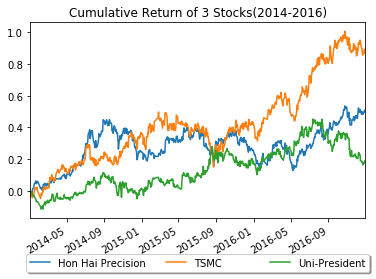

In [7]:
# 檢視各股的累積收益率
cumreturn=(1+retData).cumprod()-1
cumreturn.plot()
plt.title('Cumulative Return of 3 Stocks(2014-2016)')
plt.legend(loc='lower center',bbox_to_anchor=(0.5,-0.3),
          ncol=5, fancybox=True, shadow=True)

看一下各支股票之間的相關性，若股票之間相關性太高，投資組合降低風險的效果就比較有限。

In [8]:
# 檢視各股回報率相關性
retData=retData.dropna()
retData.corr()

,Hon Hai Precision,TSMC,Uni-President
Hon Hai Precision,1.000000,0.509155,0.328574
TSMC,0.509155,1.000000,0.353621
Uni-President,0.328574,0.353621,1.000000


從相關係數矩陣可以看出，3 支股票之間都是正向相關。

接下來 Markowitz 模型，求解資產配置比例以期待在達到目標期望收益率時最小化風險。具體做法如下：

1. 把整個資料集分為訓綀集和測試集，用訓練集的資料來求解最優資產配置比。

2. 然後，用求解的該資產配置 weight 去配置測試集中的數據，來觀察整個資產組合的累積收益率。

3. 用該資產配置的累積收益率與隨機配置這三種股票而得到的資產組合累積收益率進行對比。

首先，選取 2014 到 2015 年的數據當作訓綀集，選擇 2016 年的數據當作測試集。

In [9]:
train_set=retData['2014-01-01':'2015-12-31']
test_set=retData['2016']

根據訓練集的數據來進行 Markowitz 資產配置。我們把設定目標收益率為 0.0006，假設我們只能做多，無法做空。

In [10]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# 求共變異數矩陣
cov_mat =train_set.cov()
S =risk_models.sample_cov(train_set)

# 求收益率均值
avg_rets = train_set.mean()
mu = expected_returns.mean_historical_return(train_set)

# only long
# 設定目標收益率
#import portfolioopt as pfopt
ef = EfficientFrontier(avg_rets, cov_mat)
ww=ef.efficient_return(target_return=0.0006,market_neutral=False)
ww
#print("cov_mat=\n",cov_mat)
#print("S=\n",S)
#print("avg_rets=\n",avg_rets)
#print("mu=\n",mu)
#target_ret = 0.0006
#weights = pfopt.markowitz_portfolio(cov_mat, avg_rets, target_ret,
#  allow_short=False)
#weights

# 求共變異數矩陣
cov_mat =train_set.cov()
# 求收益率均值
avg_rets = train_set.mean()
# only long
# 設定目標收益率
import portfolioopt as pfopt
target_ret = 0.0006
weights = pfopt.markowitz_portfolio(cov_mat, avg_rets, target_ret,
  allow_short=False)
weights

{'Hon Hai Precision': 0.34586276118841813,
 'TSMC         ': 0.2893686840750273,
 'Uni-President': 0.3647685547365545}

ModuleNotFoundError: No module named 'portfolioopt'

在求資產配置比例時，我們呼叫了 Portfolioopt 模組中的 markowitz_portfolio() 函數，該函數輸入共變異數矩陣、個股均值收益率以及目標收益率，然後會回傳求解得到的資產配置比例。

接下來，在測試集中計算 Markowitz 資產配置後資產組合的累積收益率。

In [11]:
test_return=np.dot(test_set,
                  np.matrix(weights).T)
test_return=pd.DataFrame(test_return,index=test_set.index)
test_cum_return=(1+test_return).cumprod()-1
test_cum_return.columns = ['markowitz_portfolio']
test_cum_return.head()

NameError: name 'weights' is not defined

接下來，隨機產生 30 組資產配比，並求相應的資產組合收益率，然後與 Markowitz 資產配置後資產組合的累積收益率進行對比分析。

(244, 30)

                  0        1         2         3         4         5   \
Date                                                                    
2016-01-04 -0.022555 -0.01932 -0.020373 -0.021576 -0.019858 -0.020871   

                  6         7         8         9   ...        20        21  \
Date                                                ...                       
2016-01-04 -0.021325 -0.020805 -0.022419 -0.022665  ... -0.023112 -0.021559   

                  22        23        24        25        26        27  \
Date                                                                     
2016-01-04 -0.023178 -0.022213 -0.022869 -0.022328 -0.021568 -0.021707   

                  28        29  
Date                            
2016-01-04 -0.022344 -0.022386  

[1 rows x 30 columns]


NameError: name 'test_cum_return' is not defined

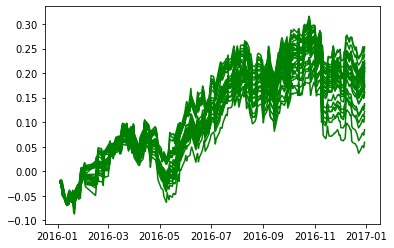

In [13]:
# 隨機產生取值為 0 到 1 的二維 array，結構為 30 rows，3 columns
sim_weight=np.random.uniform(0,1,(30,3))

# 將產生的數據進行 normalize，使得每一個 row 的元素取值之和為 1
sim_weight_normalized =np.apply_along_axis(lambda x: x/
                                        sum(x),1,sim_weight)

# 對每一個資產配比，計算資產組合收益率
sim_return=np.dot(test_set,np.matrix(sim_weight_normalized).T)
sim_return=pd.DataFrame(sim_return,index=test_set.index)

#對每一個資產配比，計算資產組合的累積收益率
sim_cum_return=(1+sim_return).cumprod()-1
sim_cum_return.shape

print(sim_cum_return.head(1))

# 繪製累積收益率圖
plt.plot(sim_cum_return.index,sim_cum_return,color='green')
plt.plot(test_cum_return.index,test_cum_return,color='red')
plt.title(' 資產組合累積收益率（Markowitz 模型與 隨機配比）')

從結果（圖 20.5）可以看出，用 Markowitz 模型解出的最優資產配置在累積收益率上，並沒有明顯的優勢。

## 20.4 Black-Litterman 模型

前文中我們提到投資人做資產配置的前提是對未來形成預期（也就是已知未來各資產 $R_1,R_2,...,R_N$ 的概率分佈），然後利用 Markowitz 模型求得最優資產配比。

Markowitz 模型輸入參數的估計包括歷史資料法和情景分析法兩種方法。情景分析法的缺點是主觀因素、隨意性太強，因此在實務上，絕大多數人是用各資產的歷史收益率資料來交替未來的預期收益率資料。整個資產配置過程基本上與上一節中 Python 實作的流程類似：先獲取各資產的歷史收益率，根據歷史資料得到各資產的收益率均值和變異數共變異數矩陣，作為 Markowitz 模型的輸入變數，最後得出最優資產配置比。

整個過程仔細琢磨起來會發現其有不足之處：基於歷史資料進行計算的基礎是，我們相信未來各資產的收益率分佈與過去相同，但是現實中過去收益率高的股票可能由於突發事件面臨破產、債券收益率可能會由於央行對利息的調控而發生變化。簡言之，歷史並不一定完全重演。

1992 年，在高盛（Goldman Sachs）工作的 Fischer Black 和 Robert Litterman 對全球債券投資組合研究時發現，當對德國債券預期報酬率做 0.1% 小幅修正後，該資產的投資比例竟然由原來的 10.0 % 提高至 55.0%。這個發現說明 Markowitz 模型得到的最優資產配比較輸入參數過於敏感。

從以上敘述可以看出，根據歷史資訊進行現在的資產配置，並期待未來的投資收益達到某個水平，這整個過程有需要改善之處。Black 和 Litterman 提出了改進的模型。

Black-Litterman 模型（簡稱 BL 模型）的核心思想是，將投資者對大類資產的觀點（主觀觀點）與市場均衡收益（先驗預期收益率）相結合，從而形成新的預期收益率（後驗預期收益率）。如果投資者沒有特別的觀點，則依舊使用先驗收益；如果投資者對某些資產有特別的觀點，則根據主觀觀點的信賴區間來調整後驗收益，從而影響投資組合配置。Black-Litterman 模型自提出以來，逐漸被華爾街主流所接受，成為高盛企業資產管理部門在資產配置上的一個主要工具。

現在我們簡要介紹下 BL 模型的求解過程。現在 $N$ 種資產，其收益率為 $R=\big\{R_1,R_2,...,R_N\big\}$，BL 模型中假設 $R$ 服從聯合常態分佈，即 $R\sim N(\mu,\Sigma)$，其中 $\mu$ 和 $\Sigma$ 為各資產預期收益率的期望值和共變異數的估計值。現在假設估計向量 $\mu$ 本身也是隨機的，並且服從常態分佈：

$$\mu\sim N(\pi,\tau\Sigma)$$

其中 $\pi$ 為先驗預期收益率之期望值，$\tau$ 在後文中會詳細解釋。BL 模型中比較特色的部分，是允許考慮投資者個人的觀點（Investor Views），處理的方式是用各資率之線性方程組來代表主觀觀點，比如一條觀點可以用以下式子表達：

$$p_{i1}\mu_1+p_{i2}\mu_2+...+p_{iN}\mu_N=q_i+\varepsilon_i$$

其中 $\varepsilon_i$ 為這條觀點的誤差向， $\varepsilon_i\sim N(0,\sigma_i^2)$，$\sigma_i^2$ 受投資人對此條觀點的信賴區（Confidence Level）影響。投資者母體觀點可以用：

$$P_\mu\sim N(Q,\Omega)$$

來表達，其中

$P$（被稱為「Pick Matrix」）為 $K\times N$ 矩陣，即對 $N$ 個資產有 $K$ 個觀點；$q$ 為看法向量（$K\times 1$ 列向量）；$\Omega$ 為看法向量 $q$ 的誤差項的共變異數矩陣，表示投資者的觀點與真實情況有所差別，$\Omega$ 為 $K\times K$ 的對角矩陣。不同的文獻對其構造方式不同，常見的方法有四種：

* 與先驗預期收益率之變異數成正比，比如 He 和 Litterman（1999）設定：
  $$\omega_{ij}=
  \begin{cases}
  p(\tau\Sigma)p^{T}&\forall i=j\\
  0&\forall i\ne j
  \end{cases}
  $$
  或者
  $$\Omega=\mathit{diag}(P(\tau\Sigma)P^T)$$

這種方法在很多文獻中都很常見，我們這裡就採用該方法來確定 $\Omega$。

* 使用信賴區間；

* 利用因子模型的殘差項的變異數；

* 用 Idzorek（2005）[<sup>8</sup>](#fn8) 的方法來確定信賴區間；

比如現在市場有五種資產 A,B,C,D,E，投資人基於自己的經驗及分析，形成以下判斷：

資產 A 的收益率為 15%

資產 B 比資產 D 的收益率高 5%

資產 B 和 C 比資產 A 的收益率低6%

據此，可以寫出反應投資人主觀觀點矩陣：

><div id="fn8"><sup>8</sup> Idzorek, Thomas M. "A step-by-step guide through the Black-Litterman model, incorporating user specified confidence levels." Chicago: Ibboston Associates (2005): 1-32.</div>

$$P=
\begin{bmatrix}
1&0&0&0&0\\
0&1&0&-1&0\\
1&-\frac{1}{2}&-\frac{1}{2}&0&0
\end{bmatrix}
$$

看法向量

$$q=[15\%,5\%,6\%]^T,$$

看法向量誤差項的共變異數矩陣：

$$\Omega=\mathit{diag}(P(\tau\Sigma)P^T)$$

根據貝氏定理，結合先驗資訊與投資者觀點的各資產預期收益率的期望值 $\mu|_{q;\Omega}$。服從常態分佈：

$$\mu|_{q;\Omega}\sim N(\mu_{BL},\Sigma_{BL}^\mu)$$

其中期望值 $\mu_{BL}$（$N\times 1$ 列向量）和共變異數矩陣 $\Sigma_{BL}^\mu$，為：

$$
\begin{split}
\mu_{BL}&=\big[(\tau\Sigma)^{-1}+P^T\Omega^{-1}P\big]^{-1}\big[(\tau\Sigma)^{-1}\pi+P^T\Omega^{-1}q\big]\\
\Sigma_{BL}^\mu&=\big[(\tau\Sigma)^{-1}+P^T\Omega^{-1}P\big]
\end{split}
$$

其中 $\tau$ 為比例係數（常數），反應主觀觀點相對於先驗資訊的比重。最後，我們可以得到結合先驗資訊與投資者觀點的各資產後驗預期收益率分佈（Posterior distribution）為：

$$R|_{q;\Omega}=\mu|_{q;\Omega}+Z$$

其中 $Z$ 為誤差項，$Z\sim N(0,\Sigma)$。因此最後各資產後驗預期收益率的期望值和變數分別為：

$$
\begin{split}
\mathrm{E}(R|_{q;\Omega})&=\mu_{BL}\\
\Sigma_{BL}&=\Sigma+\Sigma_{BL}^\mu
\end{split}
$$

有了各資產之預期收益分佈，特別是預期收益率之期望值與變異數，我們就可以根據最小化風險，或者最大化收益率來求解各資產的配比狀況。整體說來，BL 模型求解過程包括以下幾步：

1. 使用歷史資料估計預期收益率的共變異數矩陣，假設根據 $N$ 種資產過去 $T$ 期的收益率資料，則共變異數矩陣為：

   $$\hat\Sigma=
   \begin{bmatrix}
   \hat\sigma_{11}&\hat\sigma_{12}&\cdots&\hat\sigma_{1N}\\
   \hat\sigma_{21}&\hat\sigma_{22}&\cdots&\hat\sigma_{2N}\\
   \vdots&\vdots&\ddots&\vdots\\
   \hat\sigma_{N1}&\hat\sigma_{N2}&\cdots&\hat\sigma_{NN}
   \end{bmatrix}
   $$

   式中 $\hat\sigma_{ij}$ 是根據樣本資料估計出來的資產 $i$ 與 $j$ 的共變異數，表示式為 $\hat\sigma_{ij}=\mathrm{E}\big[(R_{i,t}-\mu_i)(R_{j,t}-\mu_j)\big]$，其中 $\hat\mu_i$ 為資產 $i$ 的歷史平均收益率，$\hat\mu_i=\dfrac{\sum_{t=1}^TR_{i,t}}{T}$。

2. 確定市場預期之收益率向量（$N\times 1$ 列向量），也就是先驗預期收益之期望值。我們可以用歷史收益率均值作為先驗預期收益之期望值，即 $\pi=\hat\mu$。也可以根據市場現有的價格、市場組合構成反推出市場隱藏式均衡收益率（Implied Equilibrium Return Vector）來作為先驗預期收益之期望：

   $$\pi=\lambda\hat\Sigma\omega^m$$
   
   其中 $\lambda=\dfrac{\mathrm{E}[R_m]-R_f}{\sigma_m^2}$ 為市場組合單位風險的超額收益，反應了市場的風險趨避的程度（$R_m$ 為市場組合之收益率，$R_f$ 為無風險收益，$\sigma_m^2$ 為市場組和收益率之變異數），$\omega^m$ 為市場組合各資產的投資比例，$\hat\sigma$ 為估計出來的共變異數矩陣。還可以根據 CAPM 模型中的 Alpha（歷史超額收益率）來估計 $\pi$（CAPM 模型在後面章節會提及，在這裡不詳述）。

3. 融合投資人的個人觀點，即確定 $P,q,\Omega$

4. 修正後驗收益。

5. 投資資產組合優化：透過 Black-Litterman 模型，我們可以獲得後驗收益的期望值與共變異數矩陣。根據這些資訊，我們可以進行資產配置，例如利用 Markowitz 模型進行資產配置。

### 20.4.1 Black-Litterman 模型之 Python 實作

繼續以前面三支股票（台積電，鴻海和統一）為例，根據 BL 模型求解過程做以下設定：

1. 計算出歷史收益率之均值 $\hat\mu$ 及共變異數矩陣 $\hat\Sigma$；
2. 用歷史收益率均值作為先驗預期收益之期望值，即$\pi=\hat\mu$；
3. 結合投資者個人的觀點（由 $P、Q、\Omega$ 代表，其中 $P、Q$ 為已知的輸入變數，$\Omega$ 要自己計算）；
4. 根據公式計算出後驗分佈之期望值、共變異數。

現在我們自己定義函數 blacklitterman() 來計算後驗分佈之期望值、共變異數，該函數的輸入變數有股票的歷史收益率（returns）、反應主觀觀點相對於先驗資訊的比重（tau）、代表投資人看法的 $P$ 和 $Q$。首先我們以歷史收益率均值（mu）和共變異數矩陣（sigma）作為先驗預期收益之期望值和共變異數，然後根據前文的公式計算後驗分佈之期望值和共變異數。

In [14]:
# 定義函數
from scipy import linalg
def blacklitterman(returns, tau, P, Q):
    mu=returns.mean()
    sigma=returns.cov()
    pi1=mu
    ts = tau * sigma
    Omega = np.dot(np.dot(P,ts),P.T) * np.eye(Q.shape[0])
    middle = linalg.inv(np.dot(np.dot(P,ts),P.T) + Omega)
    er = np.expand_dims(pi1,axis=0).T + np.dot(np.dot(np.dot(ts,P.T),middle),(Q - np.expand_dims(np.dot(P,pi1.T),axis=1)))
    posteriorSigma = sigma + ts - np.dot(ts.dot(P.T).dot(middle).dot(P),ts)
    return [er, posteriorSigma]

我們延續 Markowitz 模型的 3 支股票資產配置例子，在這裡要加上投資者的個人觀點進行分析。現在假設某股票分析師認為，台積電和鴻海的日均收益率將達到 0.09%；鴻海股票和統一股票的日均收益將比浙能電力高 0.03%。我們以此為根據建構個人觀點。

In [15]:
# 構造投資人的個人觀點
# 建構資產選取矩陣 P
pick1=np.array([1,1,0])
q1=np.array([0.0009])
pick2=np.array([1,0,-1])
q2=np.array([0.0003])
P=np.array([pick1,pick2])
Q=np.array([q1,q2])
print(P)
print(Q)

# 修正後驗收益
res=blacklitterman(retData,0.1, P, Q)
p_mean=pd.DataFrame(res[0],index=retData.columns,columns=['posterior_mean'])
p_mean
p_cov=res[1]
p_cov

[[ 1  1  0]
 [ 1  0 -1]]
[[0.0009]
 [0.0003]]


,posterior_mean
Hon Hai Precision,0.000492
TSMC,0.000776
Uni-President,0.000231


,Hon Hai Precision,TSMC,Uni-President
Hon Hai Precision,0.000179,0.000100,0.000066
TSMC,0.000100,0.000228,0.000077
Uni-President,0.000066,0.000077,0.000214


得到了後驗收益的期望值與共變異數矩陣後，我們就可以利用 Markowitz 模型進行資產的配置，設定目標收益率為 0.0006，假設我們只能做多，無法做空。

In [16]:
target_ret2 = 0.0006
cov_mat2 = res[1]
avg_rets2 = pd.Series(res[0][:,0],index=retData.columns)
weight2 = pfopt.markowitz_portfolio(cov_mat2, avg_rets2, target_ret2, allow_short=False)
weight2

NameError: name 'pfopt' is not defined